Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        aList = list(reader)
    
    return aList

#with open('enrollments.csv', 'rb') as f:
#    reader = unicodecsv.DictReader(f)
#    enrollments = list(reader)
enrollments = read_csv('enrollments.csv')
    
enrollments[15]

{u'account_key': u'60',
 u'cancel_date': u'',
 u'days_to_cancel': u'',
 u'is_canceled': u'False',
 u'is_udacity': u'False',
 u'join_date': u'2015-04-01',
 u'status': u'current'}

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.


daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')
    
print (daily_engagement[0])
print ('\n')
print (project_submissions[0])

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'account_key': u'0', u'utc_date': u'2015-01-09'}


{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448888555888',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def get_unique_keys(a_list,the_key):
    a_set = set()
    try:
        for item in a_list:
            a_set.add(item[the_key])
    except:
        print ('some error')
        
        
    return a_set

enrollment_num_rows = len(enrollments)             # Replace this with your code
unique_enrollment_students = get_unique_keys(enrollments,'account_key')
enrollment_num_unique_students = len(unique_enrollment_students)
print('enrollments: %d' % enrollment_num_rows)
print('unique enrollments: %d' % enrollment_num_unique_students)


engagement_num_rows = len(daily_engagement)             # Replace this with your code
unique_engagement_students = get_unique_keys(daily_engagement,'account_key')  # Replace this with your code
engagement_num_unique_students = len(unique_engagement_students)
print('enagement %d' % engagement_num_rows)
print('unique enagement %d' % engagement_num_unique_students)

submission_num_rows = len(project_submissions)             # Replace this with your code
submission_unique_students = get_unique_keys(project_submissions,'account_key')  # Replace this with your code
submission_num_unique_students = len(submission_unique_students)
print(submission_num_rows)
print(submission_num_unique_students)

print(daily_engagement[0]['account_key'])


enrollments: 1641
unique enrollments: 1303
enagement 136240
unique enagement 1237
3642
743
0


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
#actually I modified the file

## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
notEngCount = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    
    if student not in unique_engagement_students:
        #print (enrollment)
        #break
        notEngCount = notEngCount + 1

print ('Not engagement count %d' % notEngCount)
    

Not engagement count 72


## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print (enrollment)
        num_problem_students += 1

num_problem_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'448888555888', u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


4

## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

7

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [13]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

1293
134549
3618


In [15]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
paid_engagement_in_first_week = []

for eng_entry in paid_engagement:
    a_key = eng_entry['account_key']
    eng_date = eng_entry['utc_date']
    join_date = paid_students[a_key]
    
    if  within_one_week(join_date,eng_date):
        paid_engagement_in_first_week.append(eng_entry)
    
    
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [39]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

def group_data(data,key_name):
    grouped_data = defaultdict(list)
    
    for record in data:
        key_value = record[key_name]
        grouped_data[key_value].append(record)
        
    return grouped_data

def sum_grouped_data(grouped_data,field_name):
    sumed_data = {}
    for account_key, grouped_values in grouped_data.items():
    
        total_value = 0
        for a_record in grouped_values:
            total_value += a_record[field_name]
            
        sumed_data[account_key] = total_value
        
    return sumed_data

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def describe_results(total_grouped_values):
    total_values = total_grouped_values.values()
    print ('Mean: %f' % np.mean(total_values))
    print ('Standard deviation: %f' % np.std(total_values))
    print ('Minimum: %f' % np.min(total_values))
    print ('Maximum: %f' % np.max(total_values))
    plt.hist(total_values)

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')
total_minutes_by_account = sum_grouped_data(engagement_by_account,'total_minutes_visited')

Mean: 306.708327
Standard deviation: 412.996933
Minimum: 0.000000
Maximum: 3564.733264


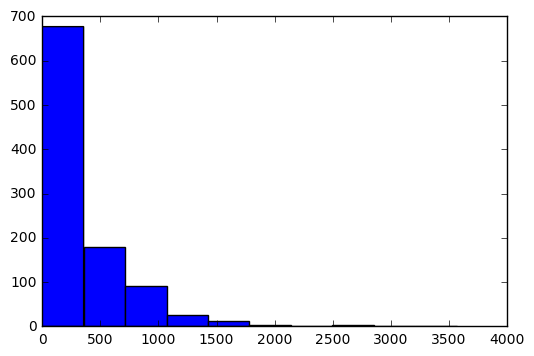

In [40]:

describe_results(total_minutes_by_account)

## Debugging Data Analysis Code

In [41]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0
c = 0
for student, total_minutes in total_minutes_by_account.items():
   
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
        
max_minutes
        

3564.7332644989997

In [42]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, u'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, u'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, u'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, u'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, u'account_key': 

## Lessons Completed in First Week

Mean: 1.636181
Standard deviation: 3.002561
Minimum: 0.000000
Maximum: 36.000000


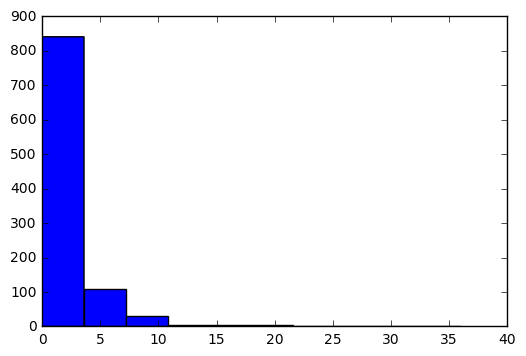

In [43]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

   
total_lessons_completed_by_account = sum_grouped_data(engagement_by_account,'lessons_completed')

describe_results(total_lessons_completed_by_account)


## Number of Visits in First Week

Mean: 2.867337
Standard deviation: 2.255198
Minimum: 0.000000
Maximum: 7.000000


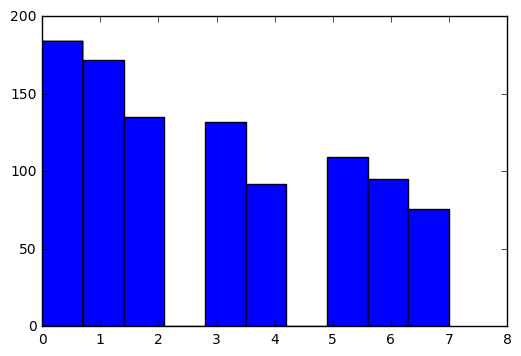

In [44]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
total_first_week = sum_grouped_data(engagement_by_account,'has_visited')

describe_results(total_first_week)

## Splitting out Passing Students

In [45]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

subway_submissions = group_data(paid_submissions,'lesson_key')
passing_engagement = []
non_passing_engagement = []

pass_subway_project = set()
        
for submission in paid_submissions:
    project = submission['lesson_key']
    rating  = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and \
        (rating == 'PASSED' or rating == 'DISTINCTION'):
            pass_subway_project.add(submission['account_key'])

print len(pass_subway_project)

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
    
print len(passing_engagement)
print len(non_passing_engagement)

647
4527
2392


## Comparing the Two Student Groups

minutes for Passing students
Mean: 394.586046
Standard deviation: 448.499519
Minimum: 0.000000
Maximum: 3564.733264


minutes for NON Passing students
Mean: 143.326474
Standard deviation: 269.538619
Minimum: 0.000000
Maximum: 1768.522749




lessons_completed for Passing students
Mean: 2.052550
Standard deviation: 3.142227
Minimum: 0.000000
Maximum: 36.000000


lessons_completed for NON Passing students
Mean: 0.862069
Standard deviation: 2.549160
Minimum: 0.000000
Maximum: 27.000000




days_visited for Passing students
Mean: 3.384853
Standard deviation: 2.258821
Minimum: 0.000000
Maximum: 7.000000


days_visited for NON Passing students
Mean: 1.905172
Standard deviation: 1.905731
Minimum: 0.000000
Maximum: 7.000000


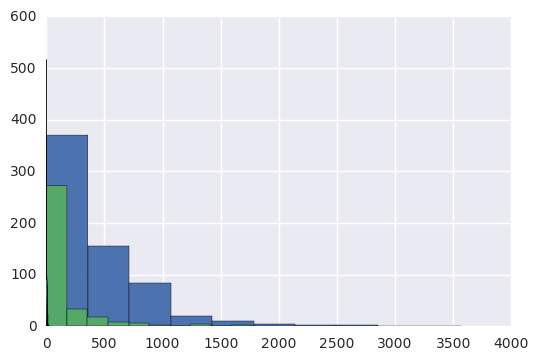

In [130]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).



passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

total_minutes_by_pass_account = sum_grouped_data(passing_engagement_by_account,'total_minutes_visited')
print 'minutes for Passing students'
describe_results(total_minutes_by_pass_account)

print '\n'

total_minutes_by_non_pass_account = sum_grouped_data(non_passing_engagement_by_account,'total_minutes_visited')
print 'minutes for NON Passing students'
describe_results(total_minutes_by_non_pass_account)

print '\n'
print '\n'

lessons_completed_by_pass_account = sum_grouped_data(passing_engagement_by_account,'lessons_completed')
print 'lessons_completed for Passing students'
describe_results(lessons_completed_by_pass_account)

print '\n'

lessons_completed_by_non_pass_account = sum_grouped_data(non_passing_engagement_by_account,'lessons_completed')
print 'lessons_completed for NON Passing students'
describe_results(lessons_completed_by_non_pass_account)


print '\n'
print '\n'

days_visited_by_pass_account = sum_grouped_data(passing_engagement_by_account,'has_visited')
print 'days_visited for Passing students'
describe_results(days_visited_by_pass_account)

print '\n'

days_visited_by_non_pass_account = sum_grouped_data(non_passing_engagement_by_account,'has_visited')
print 'days_visited for NON Passing students'
describe_results(days_visited_by_non_pass_account)

## Making Histograms

(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

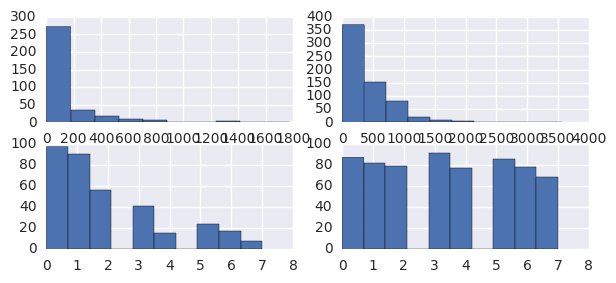

In [132]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 3), sharey=False,sharex=False)
axes[0,0].hist(total_minutes_by_non_pass_account.values())
axes[1,0].hist(days_visited_by_non_pass_account.values())

axes[0,1].hist(total_minutes_by_pass_account.values())
axes[1,1].hist(days_visited_by_pass_account.values())




## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.